
# **1. Setup and Configuration**
**Install necessary libraries using pip.**

**Import all required libraries and modules.**

**Configure the environment to suppress warnings.**

# **2. Data Preparation**
**Load the dataset.**

**Remove unnecessary columns.**

**Handle missing values, if any are present.**

**Encode categorical data using LabelEncoder.**

**Display basic statistics and information about data types.**



# **3. Data Visualization**
**Generate plots for gender distribution and health status.**

**Create a correlation heatmap to understand relationships between features.**

**Produce histograms for all features to observe distributions.**

# **4. Data Preprocessing**
**Split data into features (X) and target (y).**

**Apply train-test split.**

**Use SMOTE to balance the dataset.**

**Scale the features using MinMaxScaler.**

# **5. Model Setup and Hyperparameter Tuning**
**Define parameter spaces for different models (Perceptron, Logistic Regression, etc.).**


**Implement a function to perform hyperparameter tuning using Bayesian optimization and train the model.**

# **6. Model Training and Evaluation**


**Train traditional machine learning models (SVM, Decision Trees, etc.) and evaluate them using metrics like accuracy, precision, recall, F1-score, and confusion matrices.**


In [ ]:
!pip install scikit-learn scikit-optimize matplotlib seaborn

# **Import Libraries**

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seabor<n as sns
from sklearn.svm import SVC
from skopt import BayesSearchCV
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from skopt.space import Real, Categorical, Integer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve

# **Load Health Advisor Dataset**

In [ ]:
df = pd.read_csv('/content/Health Advisor.csv')
df

,sr no.,Gender,Age,SBP,HBP,heart_rate,Glucose,SpO2,Temprature,Health_status,Unnamed: 10,Unnamed: 11
0,1,M,67,145,84,116,128,98,97.8,1,NaN,NaN
1,2,M,71,150,90,110,120,99,97.8,2,NaN,NaN
2,3,F,59,146,85,124,140,97,98.0,1,NaN,NaN
3,4,M,55,180,109,123,145,98,99.0,8,NaN,NaN
4,5,M,75,145,87,123,205,97,96.7,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
625,626,M,80,135,88,110,132,98,98.0,1,NaN,NaN
626,627,M,55,137,85,100,87,98,97.1,5,NaN,NaN
627,628,M,67,139,89,102,131,94,96.8,6,NaN,NaN
628,629,M,77,184,94,114,74,96,98.0,9,NaN,NaN


# **Drop Unnecessary Column**

In [ ]:
df = df.drop(['sr no.', 'Unnamed: 10', 'Unnamed: 11'], axis=1)
df.head()

,Gender,Age,SBP,HBP,heart_rate,Glucose,SpO2,Temprature,Health_status
0,M,67,145,84,116,128,98,97.8,1
1,M,71,150,90,110,120,99,97.8,2
2,F,59,146,85,124,140,97,98.0,1
3,M,55,180,109,123,145,98,99.0,8
4,M,75,145,87,123,205,97,96.7,4


# **Encode Data**

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# **Display Null Value**

In [ ]:
null_values = df.isnull().sum()
null_values

Gender           0
Age              0
SBP              0
HBP              0
heart_rate       0
Glucose          0
SpO2             0
Temprature       0
Health_status    0
dtype: int64

# **Display Statistic**

In [ ]:
summary_stats = df.describe()
summary_stats

,Gender,Age,SBP,HBP,heart_rate,Glucose,SpO2,Temprature,Health_status
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.558730,67.138095,143.45873,88.585714,106.841270,134.141270,96.434921,98.112381,4.869841
std,0.496933,13.162129,26.46804,10.246786,22.862627,34.027073,2.915566,1.466447,2.930929
min,0.000000,45.000000,85.00000,65.000000,70.000000,62.000000,78.000000,96.000000,1.000000
25%,0.000000,58.000000,135.00000,85.000000,89.000000,126.000000,96.000000,97.200000,2.000000
50%,1.000000,65.000000,140.00000,88.000000,102.000000,130.000000,97.000000,98.000000,5.000000
75%,1.000000,76.000000,150.00000,93.000000,123.000000,138.000000,98.000000,98.200000,8.000000
max,1.000000,100.000000,219.00000,118.000000,170.000000,271.000000,99.000000,104.000000,9.000000


# **Display Datatype**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         630 non-null    int64  
 1   Age            630 non-null    int64  
 2   SBP            630 non-null    int64  
 3   HBP            630 non-null    int64  
 4   heart_rate     630 non-null    int64  
 5   Glucose        630 non-null    int64  
 6   SpO2           630 non-null    int64  
 7   Temprature     630 non-null    float64
 8   Health_status  630 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 44.4 KB


# **Display "Health_status" Count**

In [ ]:
counts = df['Health_status'].value_counts()
counts

Health_status
9    123
1    105
2     89
4     65
5     56
3     54
8     51
7     46
6     41
Name: count, dtype: int64

# **Gender distribution**


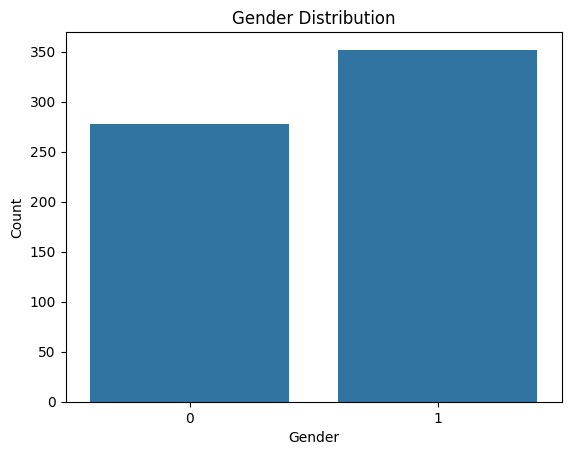

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# **Bar Plot "Health_status"**

<Axes: xlabel='Health_status', ylabel='count'>

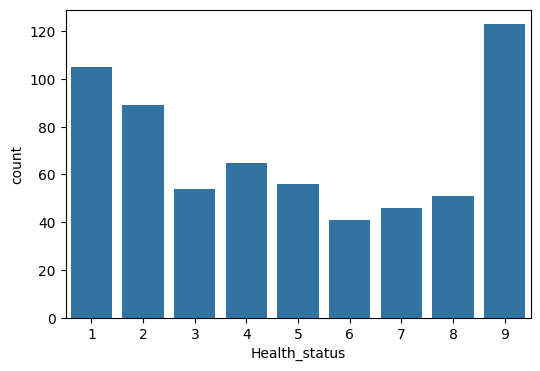

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Health_status'])

# **Pie Plot "Health_status"**

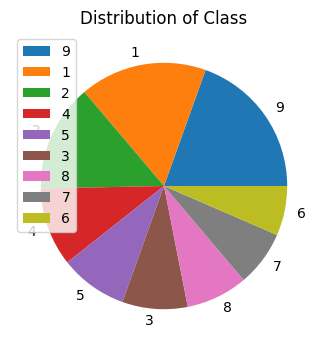

In [ ]:
plt.figure(figsize=(6,4))
class_counts = df['Health_status'].value_counts()
plt.pie(class_counts, labels=class_counts.index)
plt.title('Distribution of Class')
plt.legend()
plt.show()

# **Display Correlation Heatmap**

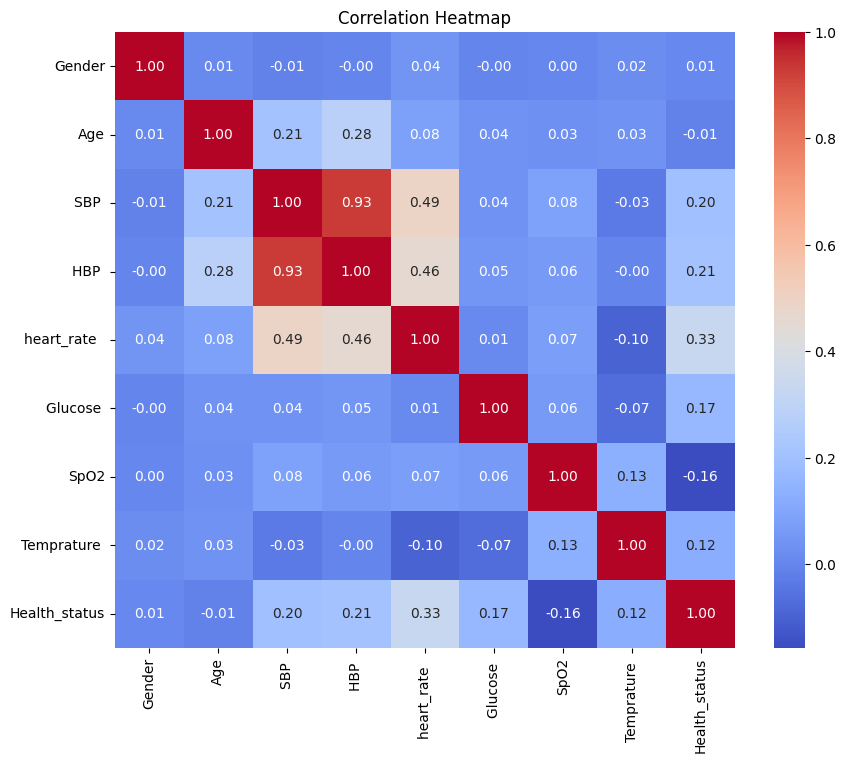

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Histograms All Features**

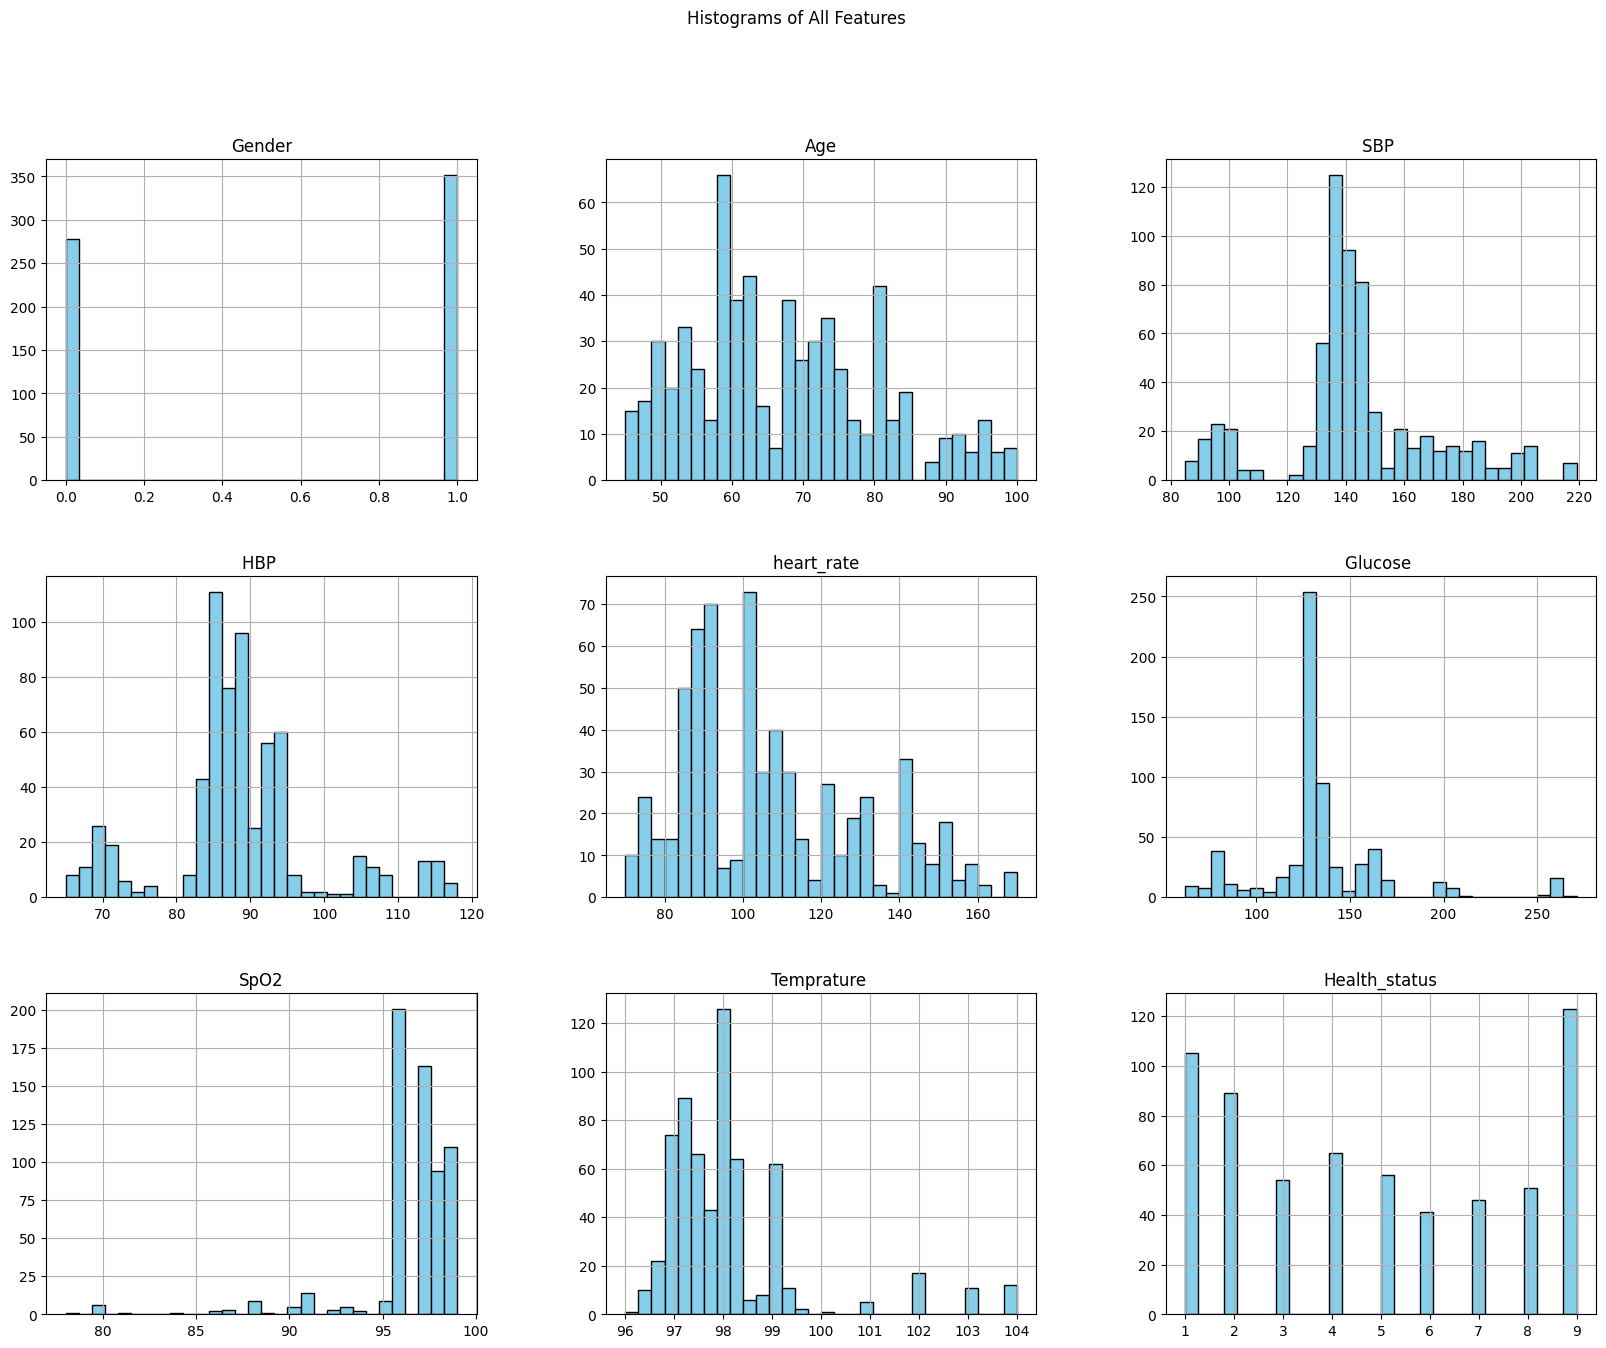

In [ ]:
df.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of All Features')
plt.show()

# **Separate Data**

In [ ]:
X = df.drop('Health_status', axis=1)
y = df['Health_status']-1

# **Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Apply SMOTE for balanced Data**

In [ ]:
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

# **Scale Data**

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_reshape = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshape = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

#**Hyper parameter tunning and Training function**

In [ ]:
def optimize_and_train(model, param_space, X_train, y_train, X_test, y_test):
    bayes_search = BayesSearchCV(model, param_space, n_iter=30, scoring='accuracy', cv=5, random_state=42)
    bayes_search.fit(X_train, y_train)
    best_params = bayes_search.best_params_
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Best parameters: {best_params}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', linewidths=0.5, linecolor='black')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# **Define the parameter spaces for each model**


In [ ]:
spaces = {
    Perceptron(): {
        'penalty': Categorical(['l2', 'l1', 'elasticnet']),
        'alpha': Real(0.0001, 0.1, prior='log-uniform'),
        'max_iter': Integer(1000, 5000)
    },
    LogisticRegression(): {
        'penalty': Categorical(['l2', 'none']),
        'C': Real(0.01, 10, prior='log-uniform'),
        'solver': Categorical(['lbfgs', 'saga'])
    },
    KNeighborsClassifier(): {
        'n_neighbors': Integer(3, 30),
        'weights': Categorical(['uniform', 'distance']),
        'algorithm': Categorical(['auto', 'ball_tree', 'kd_tree', 'brute'])
    },
    SVC(): {
        'C': Real(0.1, 100, prior='log-uniform'),
        'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
        'gamma': Real(0.001, 1, prior='log-uniform')
    },
    DecisionTreeClassifier(): {
        'criterion': Categorical(['gini', 'entropy']),
        'max_depth': Integer(10, 100),
        'min_samples_split': Integer(2, 20),
        'min_samples_leaf': Integer(1, 10)
    },
    RandomForestClassifier(): {
        'n_estimators': Integer(100, 1000),
        'max_features': Categorical(['auto', 'sqrt', 'log2']),
        'max_depth': Integer(10, 100),
        'min_samples_split': Integer(2, 20),
        'min_samples_leaf': Integer(1, 10)
    },
}

# **Supervised Learning Models**

# **Perceprton, LogisticRegression,KNeighborsClassifier, SVC, DecisionTreeClassifier,RandomForestClassifier**


Optimizing and training Perceptron
Best parameters: OrderedDict([('alpha', 0.0004526271433912019), ('max_iter', 5000), ('penalty', 'l1')])
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        22
           1       0.67      0.18      0.29        11
           2       0.64      0.75      0.69        12
           3       0.30      0.73      0.42        15
           4       0.87      1.00      0.93        13
           5       0.54      0.88      0.67         8
           6       0.75      1.00      0.86         6
           7       0.79      1.00      0.88        15
           8       0.83      0.42      0.56        24

    accuracy                           0.62       126
   macro avg       0.71      0.69      0.63       126
weighted avg       0.74      0.62      0.60       126

Accuracy: 0.6190476190476191


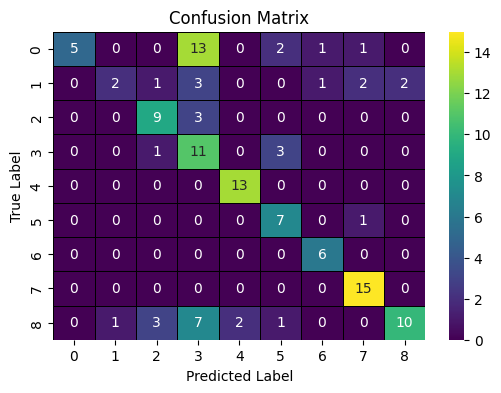


Optimizing and training LogisticRegression
Best parameters: OrderedDict([('C', 0.16994636371262764), ('penalty', 'none'), ('solver', 'saga')])
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        22
           1       0.33      0.36      0.35        11
           2       0.73      0.92      0.81        12
           3       0.70      0.93      0.80        15
           4       0.87      1.00      0.93        13
           5       0.88      0.88      0.88         8
           6       0.75      1.00      0.86         6
           7       0.83      1.00      0.91        15
           8       0.75      0.38      0.50        24

    accuracy                           0.75       126
   macro avg       0.75      0.80      0.76       126
weighted avg       0.76      0.75      0.74       126

Accuracy: 0.753968253968254


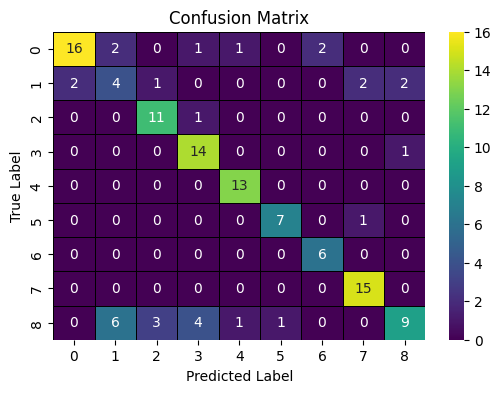


Optimizing and training KNeighborsClassifier
Best parameters: OrderedDict([('algorithm', 'brute'), ('n_neighbors', 4), ('weights', 'distance')])
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.54      0.64      0.58        11
           2       0.71      0.83      0.77        12
           3       0.93      0.93      0.93        15
           4       0.93      1.00      0.96        13
           5       0.88      0.88      0.88         8
           6       1.00      1.00      1.00         6
           7       0.94      1.00      0.97        15
           8       0.88      0.58      0.70        24

    accuracy                           0.85       126
   macro avg       0.85      0.87      0.86       126
weighted avg       0.86      0.85      0.85       126

Accuracy: 0.8492063492063492


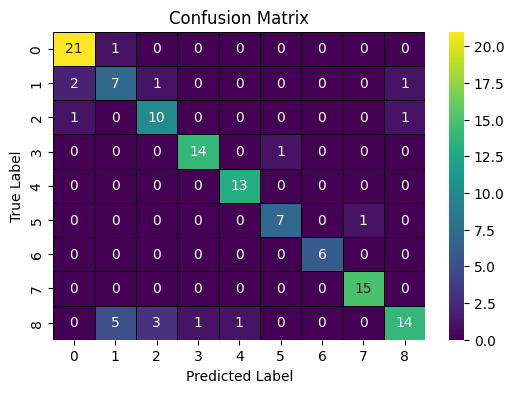


Optimizing and training SVC
Best parameters: OrderedDict([('C', 100.0), ('gamma', 0.6610223517651269), ('kernel', 'rbf')])
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.59      0.91      0.71        11
           2       0.75      0.75      0.75        12
           3       1.00      0.93      0.97        15
           4       1.00      1.00      1.00        13
           5       1.00      0.88      0.93         8
           6       0.75      1.00      0.86         6
           7       1.00      1.00      1.00        15
           8       0.83      0.62      0.71        24

    accuracy                           0.87       126
   macro avg       0.87      0.89      0.87       126
weighted avg       0.88      0.87      0.87       126

Accuracy: 0.8650793650793651


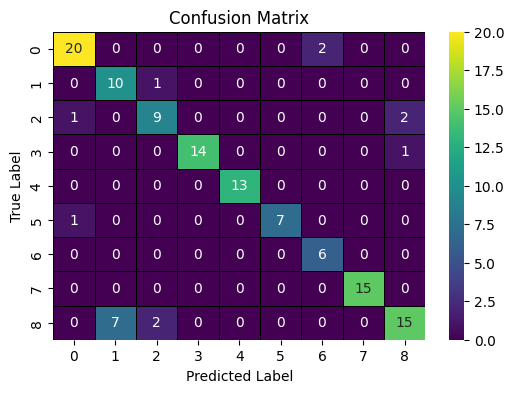


Optimizing and training DecisionTreeClassifier
Best parameters: OrderedDict([('criterion', 'gini'), ('max_depth', 57), ('min_samples_leaf', 1), ('min_samples_split', 20)])
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.75      0.82      0.78        11
           2       0.79      0.92      0.85        12
           3       1.00      0.93      0.97        15
           4       1.00      1.00      1.00        13
           5       0.88      0.88      0.88         8
           6       1.00      1.00      1.00         6
           7       0.94      1.00      0.97        15
           8       0.95      0.79      0.86        24

    accuracy                           0.92       126
   macro avg       0.92      0.93      0.92       126
weighted avg       0.93      0.92      0.92       126

Accuracy: 0.9206349206349206


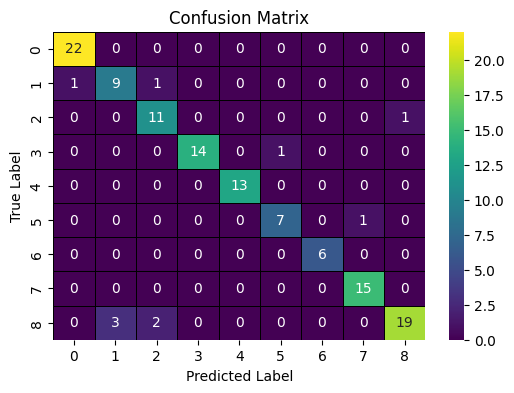


Optimizing and training RandomForestClassifier
Best parameters: OrderedDict([('max_depth', 100), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 13), ('n_estimators', 100)])
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.77      0.91      0.83        11
           2       0.85      0.92      0.88        12
           3       1.00      0.93      0.97        15
           4       1.00      1.00      1.00        13
           5       0.88      0.88      0.88         8
           6       1.00      1.00      1.00         6
           7       0.94      1.00      0.97        15
           8       0.95      0.83      0.89        24

    accuracy                           0.94       126
   macro avg       0.93      0.94      0.93       126
weighted avg       0.94      0.94      0.94       126

Accuracy: 0.9365079365079365


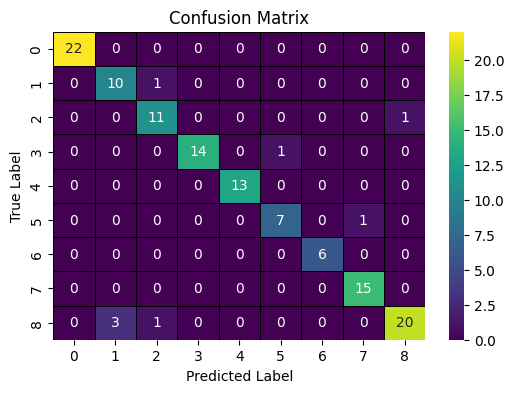

In [ ]:
for model, space in spaces.items():
    print(f"\nOptimizing and training {model.__class__.__name__}")
    optimize_and_train(model, space, X_train_scaled, y_train, X_test_scaled, y_test)